In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('TATAMOTORS.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-12-01,173.042435,173.042435,155.268692,161.515854,141.449173,10001085.0
1,2006-12-04,162.023666,170.512909,162.023666,169.085266,148.078171,18491096.0
2,2006-12-05,170.167969,170.867416,167.293518,169.209824,148.187225,6699838.0
3,2006-12-06,167.121048,170.167969,165.568832,168.912796,147.927109,4822862.0
4,2006-12-07,168.634933,171.701019,167.322250,171.068634,149.815109,3963218.0


In [3]:
df.shape

(4233, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03
mean,294.107080,298.331216,289.338873,293.656721,289.343326,1.862898e+07
std,158.762613,160.110199,157.127829,158.536982,160.794217,2.445423e+07
min,24.952360,26.040688,24.695120,24.972149,22.980335,0.000000e+00
25%,155.343784,158.097477,152.566769,155.336357,145.959488,6.562863e+06
50%,278.500000,282.420746,272.551621,278.290054,274.208282,1.069339e+07
75%,423.862496,428.412506,418.802757,423.137497,421.586052,1.963927e+07
max,823.849976,827.000000,819.500000,823.549988,823.549988,3.905778e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4233 entries, 0 to 4232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4233 non-null   object 
 1   Open       4226 non-null   float64
 2   High       4226 non-null   float64
 3   Low        4226 non-null   float64
 4   Close      4226 non-null   float64
 5   Adj Close  4226 non-null   float64
 6   Volume     4226 non-null   float64
dtypes: float64(6), object(1)
memory usage: 231.6+ KB


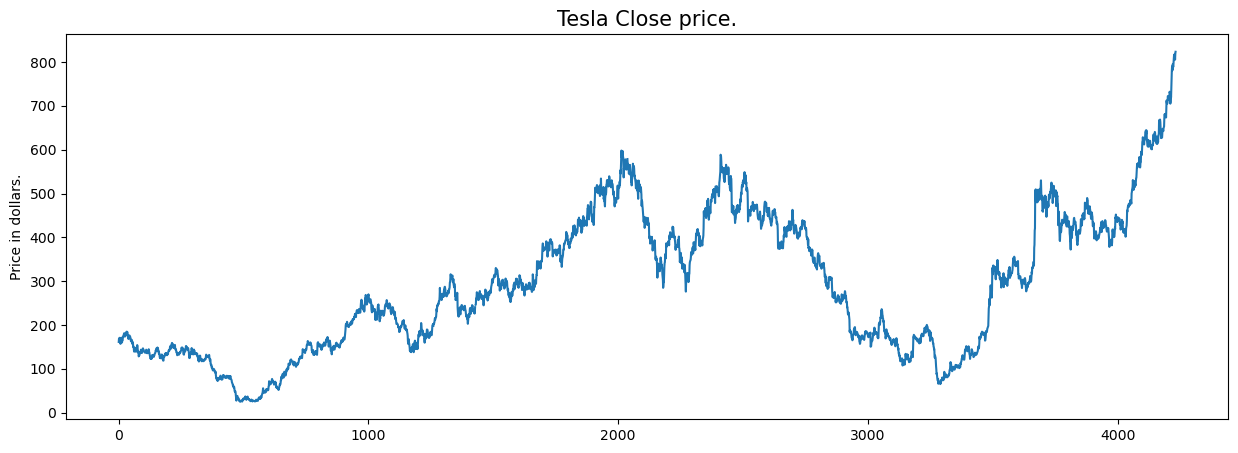

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-12-01,173.042435,173.042435,155.268692,161.515854,141.449173,10001085.0
1,2006-12-04,162.023666,170.512909,162.023666,169.085266,148.078171,18491096.0
2,2006-12-05,170.167969,170.867416,167.293518,169.209824,148.187225,6699838.0
3,2006-12-06,167.121048,170.167969,165.568832,168.912796,147.927109,4822862.0
4,2006-12-07,168.634933,171.701019,167.322250,171.068634,149.815109,3963218.0


In [8]:
df[df['Close'] == df['Adj Close']].shape

(119, 7)

In [9]:
df = df.drop(['Adj Close'], axis=1)

In [10]:
df.isnull().sum()

Date      0
Open      7
High      7
Low       7
Close     7
Volume    7
dtype: int64

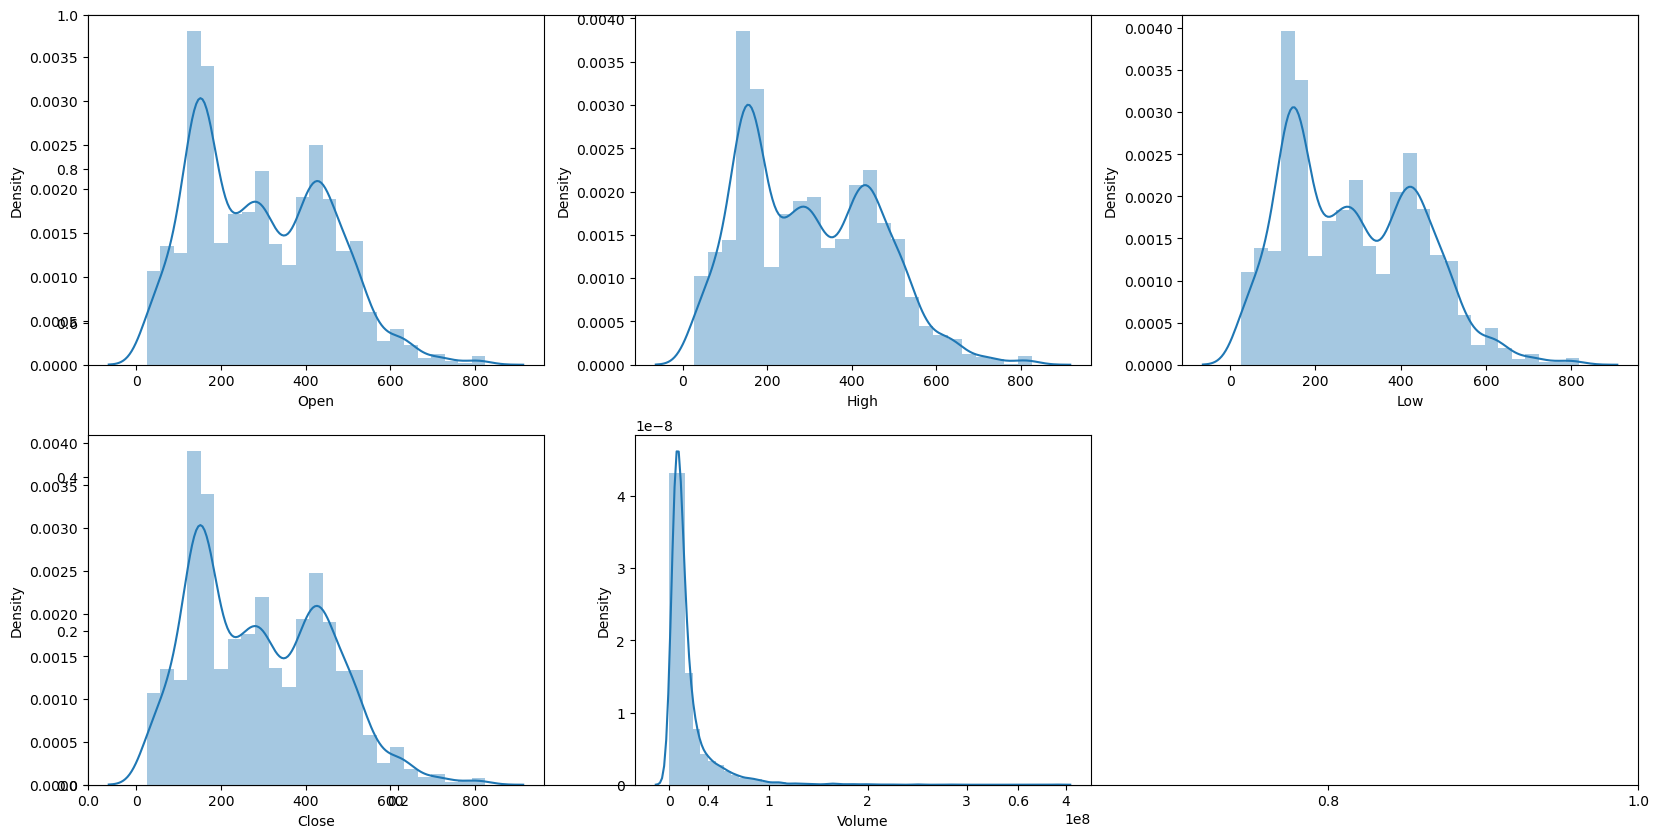

In [11]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

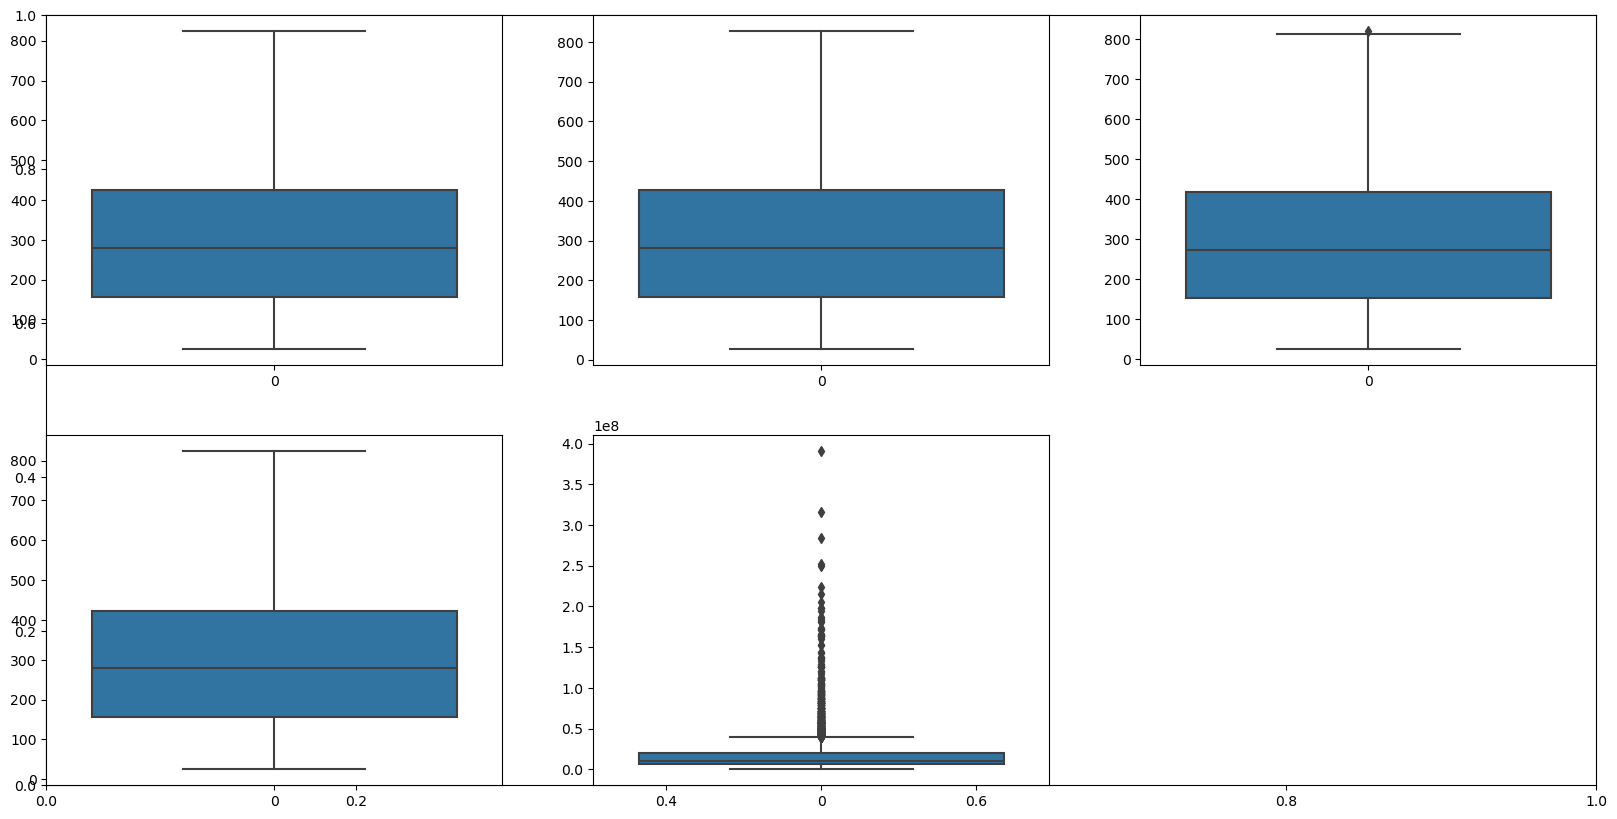

In [12]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [13]:
# Splitting the 'Date' column using '-' as the delimiter
splitted = df['Date'].str.split('-', expand=True)

# Converting the split values into integer columns
df['year'] = splitted[0].astype(int)
df['month'] = splitted[1].astype(int)
df['day'] = splitted[2].astype(int)

# Displaying the first few rows of the DataFrame
df.head()


,Date,Open,High,Low,Close,Volume,year,month,day
0,2006-12-01,173.042435,173.042435,155.268692,161.515854,10001085.0,2006,12,1
1,2006-12-04,162.023666,170.512909,162.023666,169.085266,18491096.0,2006,12,4
2,2006-12-05,170.167969,170.867416,167.293518,169.209824,6699838.0,2006,12,5
3,2006-12-06,167.121048,170.167969,165.568832,168.912796,4822862.0,2006,12,6
4,2006-12-07,168.634933,171.701019,167.322250,171.068634,3963218.0,2006,12,7


In [14]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2006-12-01,173.042435,173.042435,155.268692,161.515854,10001085.0,2006,12,1,1
1,2006-12-04,162.023666,170.512909,162.023666,169.085266,18491096.0,2006,12,4,1
2,2006-12-05,170.167969,170.867416,167.293518,169.209824,6699838.0,2006,12,5,1
3,2006-12-06,167.121048,170.167969,165.568832,168.912796,4822862.0,2006,12,6,1
4,2006-12-07,168.634933,171.701019,167.322250,171.068634,3963218.0,2006,12,7,1


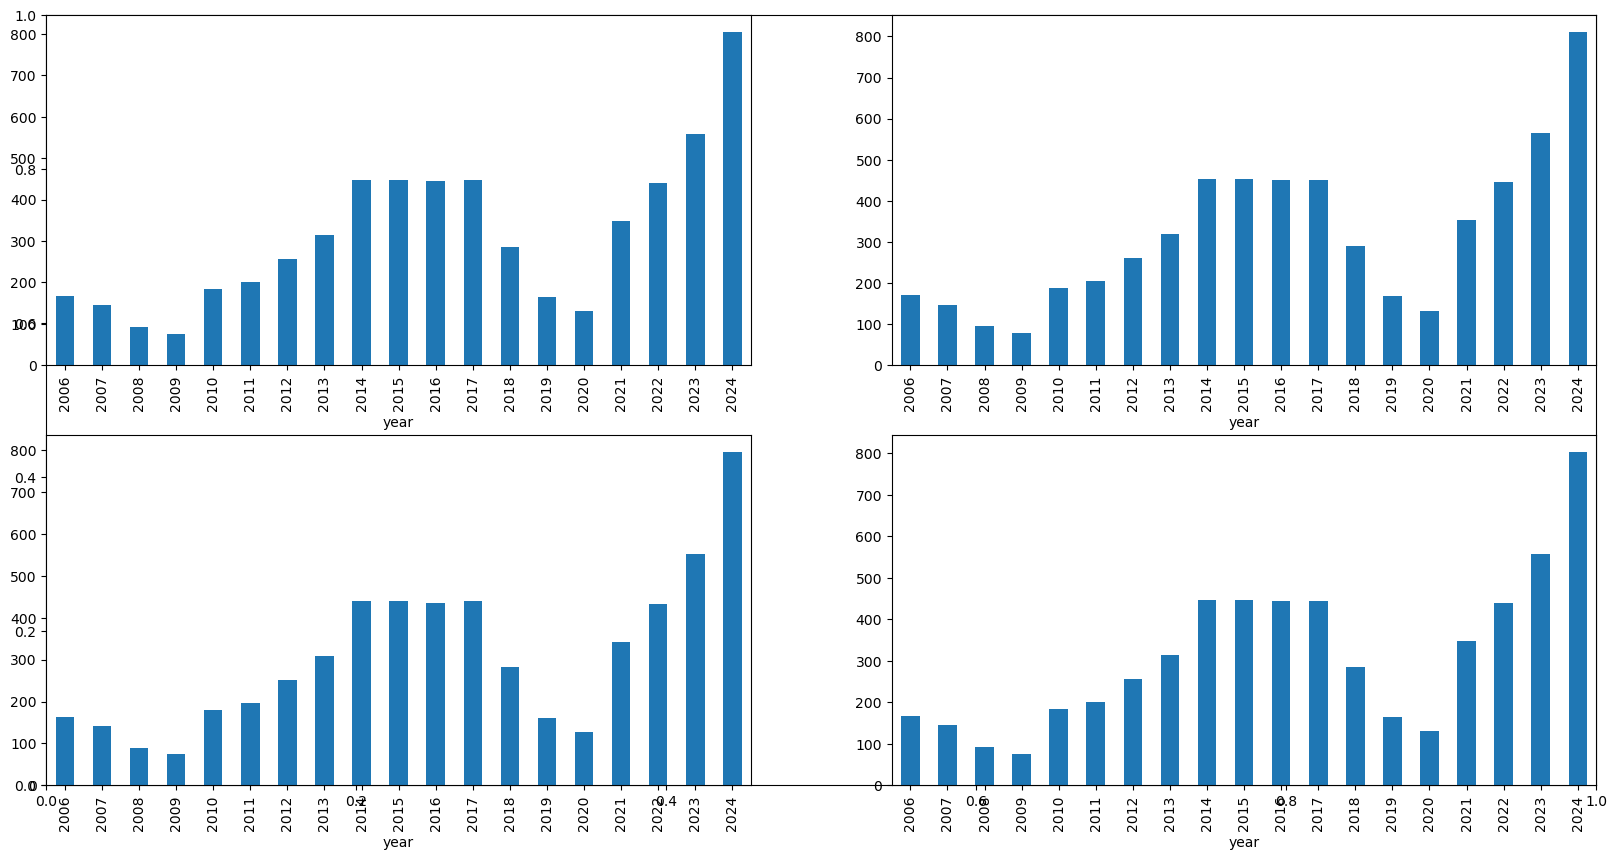

In [15]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [16]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,year,month,day
is_quarter_end,,,,,,,,
0,294.807687,299.189686,289.982712,294.430436,1.895524e+07,2015.036123,5.968526,15.801502
1,292.742998,296.659775,288.085319,292.150298,1.799375e+07,2014.898399,7.582463,15.680585


In [17]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

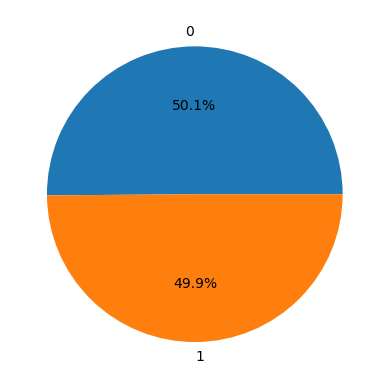

In [18]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

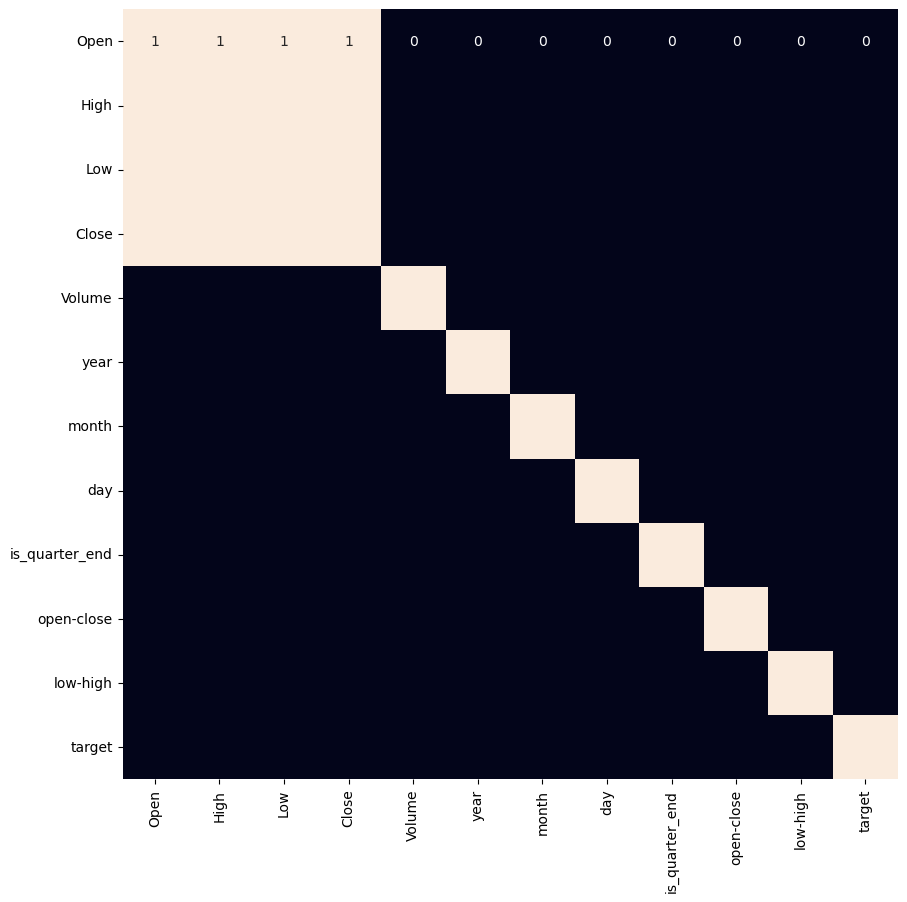

In [19]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

In [20]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(3809, 3) (424, 3)


In [21]:
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_valid
imputer = SimpleImputer(strategy='mean')  # You can use 'median', 'most_frequent', or a constant value
X_train = imputer.fit_transform(X_train)
X_valid = imputer.transform(X_valid)


In [22]:
# Identify rows without NaN values
train_mask = ~np.isnan(X_train).any(axis=1)
valid_mask = ~np.isnan(X_valid).any(axis=1)

# Filter rows in X_train and Y_train
X_train = X_train[train_mask]
Y_train = Y_train[train_mask]

# Filter rows in X_valid and Y_valid
X_valid = X_valid[valid_mask]
Y_valid = Y_valid[valid_mask]


In [23]:
from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')

# Impute missing values
X_train = imputer.fit_transform(X_train)
X_valid = imputer.transform(X_valid)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define a list of models
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(probability=True)
]



In [25]:
for model in models:
    model.fit(X_train, Y_train)
    print(f"Model: {model.__class__.__name__}")
    print('Training Accuracy :', metrics.roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1]))
    print('Validation Accuracy :', metrics.roc_auc_score(Y_valid, model.predict_proba(X_valid)[:, 1]))


Model: LogisticRegression
Training Accuracy : 0.5135430509222244
Validation Accuracy : 0.4847248238337347
Model: RandomForestClassifier
Training Accuracy : 0.9999889719059304
Validation Accuracy : 0.5263691909731514
Model: SVC
Training Accuracy : 0.5
Validation Accuracy : 0.5


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification

# Example dataset generation (replace with your actual dataset)
X, Y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define pipeline with a single model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', LogisticRegression())  # Initial model
])

pipeline.fit(X_train, Y_train)
print('Pipeline Training Accuracy : ', metrics.roc_auc_score(
    Y_train, pipeline.predict_proba(X_train)[:, 1]))
print('Pipeline Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, pipeline.predict_proba(X_valid)[:, 1]))

# List of models
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(probability=True)
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, Y_train)
    print(f"Model: {model.__class__.__name__}")
    print('Training Accuracy :', metrics.roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1]))
    print('Validation Accuracy :', metrics.roc_auc_score(Y_valid, model.predict_proba(X_valid)[:, 1]))


Pipeline Training Accuracy :  0.9393064125888554
Pipeline Validation Accuracy :  0.9216159179981912
Model: LogisticRegression
Training Accuracy : 0.9393064125888554
Validation Accuracy : 0.9216159179981912
Model: RandomForestClassifier
Training Accuracy : 1.0
Validation Accuracy : 0.9384483971460155
Model: SVC
Training Accuracy : 0.9739420197435465
Validation Accuracy : 0.9237262586674706


In [28]:
from sklearn.utils.validation import check_is_fitted

try:
    check_is_fitted(models[0])
except NotFittedError:
    print("Model is not fitted yet. Fitting now...")
    models[0].fit(X_train, Y_train)


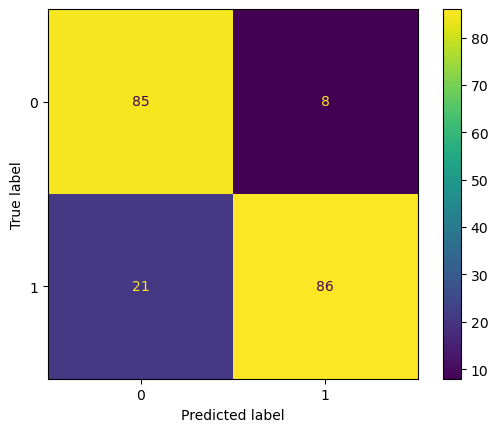

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Fit the Logistic Regression model (if not already fitted)
models[0].fit(X_train, Y_train)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()
